 # 5.1P
 
 1. Load the dataset from “data_5.csv”.  Create training and test datasets using random splitting (80-20)%. Print the  number of samples in train and test data group by "roof_type".

 2.  Create training and test dataset using leave 5 "property_id" out for testing and rest of them for training. Print the train and test dataset for the first iteration only. Compare with Q-1 in terms of the number of training and testing samples using bar graph.

In [1]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Question 1

In [2]:
# Load the dataset
df = pd.read_csv('../data/data_5.csv')

# Show head
df.head()

,structure_max_elevation,footprint_max_elevation,structure_min_elevation,property_id,footprint_extrusion,footprint_min_elevation,structure_extrusion,roof_type
0,30.5,30.5,17.5,109953,13.5,17.5,13.0,Flat
1,32.5,26.5,18.0,105685,9.0,18.0,8.5,Flat
2,32.5,32.5,18.0,105685,5.5,26.5,14.5,Hip
3,20.5,19.5,17.0,104550,2.0,17.0,2.5,Flat
4,24.5,23.5,17.0,104870,6.0,17.0,6.5,Flat


In [3]:
# Create training and test datasets using random splitting (80-20)%
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

# Print the  number of samples in train and test data group by "roof_type"
print(f"Number of training samples: {training_data.groupby('roof_type').size()}")
print("Total: ", training_data.shape[0])
print(f"\nNumber of testing samples: {testing_data.groupby('roof_type').size()}")
print("Total: ", testing_data.shape[0])

Number of training samples: roof_type
Flat       1663
Gable       423
Hip         301
Pyramid      10
Shed          3
dtype: int64
Total:  2400

Number of testing samples: roof_type
Flat       410
Gable      107
Hip         80
Pyramid      2
Shed         1
dtype: int64
Total:  600


### Question 2

_**Create training and test dataset using leave 5 "property_id" out for testing and rest of them for training**_

In [4]:
# Test data - Split dataset so that the first 5 property_id are in the test dataset and the rest are in the training dataset

# Add rows for which property_id is 105685, 110742, 104550, and 104870 to drop_property_id dataframe
testing_data2 = df.loc[df['property_id'] == 109953]
testing_data2 = testing_data2.append(df.loc[df['property_id'] == 105685])
testing_data2 = testing_data2.append(df.loc[df['property_id'] == 110742])
testing_data2 = testing_data2.append(df.loc[df['property_id'] == 104550])
testing_data2 = testing_data2.append(df.loc[df['property_id'] == 104870])

testing_data2.head()
testing_data2.shape

(16, 8)

In [5]:
# Training data - Split dataset so that the first 5 property_id are in the test dataset and the rest are in the training dataset
training_data2 = df.iloc[5:]

print(training_data2.shape)
print(testing_data2.shape)

# Print the number of samples in train and test data group by "roof_type"
print(f"Number of training samples: {training_data.groupby('roof_type').size()}")
print("Total: ", training_data.shape[0])
print(f"\nNumber of testing samples: {testing_data.groupby('roof_type').size()}")
print("Total: ", testing_data.shape[0])

(2995, 8)
(16, 8)
Number of training samples: roof_type
Flat       1663
Gable       423
Hip         301
Pyramid      10
Shed          3
dtype: int64
Total:  2400

Number of testing samples: roof_type
Flat       410
Gable      107
Hip         80
Pyramid      2
Shed         1
dtype: int64
Total:  600


_**Print the train and test dataset for the first iteration only**_

In [6]:
# Print the train and test dataset for the first iteration only
print("Training dataset - first row: \n", training_data[:1])
print("\nTesting dataset - first row: \n", testing_data[:1])

Training dataset - first row: 
       structure_max_elevation  footprint_max_elevation  \
1963                     23.5                     23.5   

      structure_min_elevation  property_id  footprint_extrusion  \
1963                     14.0       576311                  9.5   

      footprint_min_elevation  structure_extrusion roof_type  
1963                     14.0                  9.5      Flat  

Testing dataset - first row: 
       structure_max_elevation  footprint_max_elevation  \
1389                    215.0                    215.0   

      structure_min_elevation  property_id  footprint_extrusion  \
1389                     26.5       108566                  3.0   

      footprint_min_elevation  structure_extrusion roof_type  
1389                    212.0                188.5      Flat  


_**Compare with Q-1 in terms of the number of training and testing samples using bar graph**_

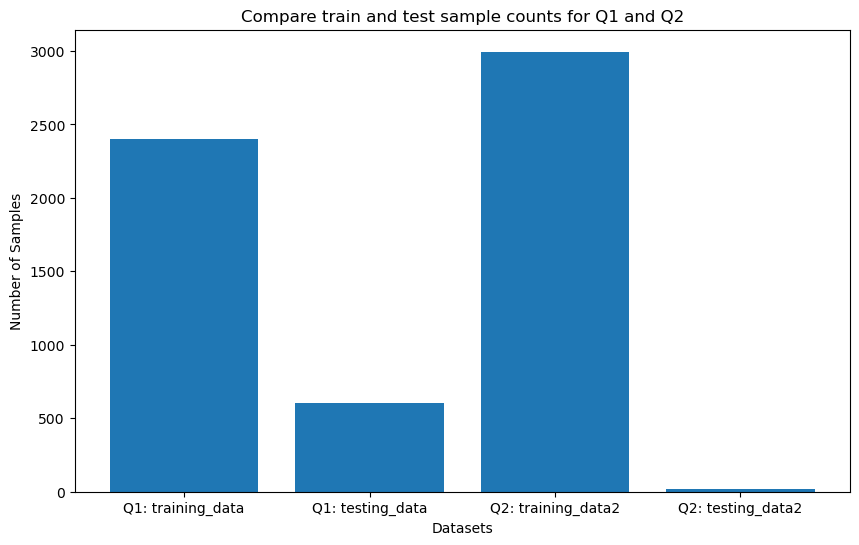

In [7]:
# Names for the datasets (x-axis)
datasets = ['Q1: training_data', 'Q1: testing_data', 'Q2: training_data2', 'Q2: testing_data2']

# Number of samples in each dataset (y-axis)
samples = [training_data.shape[0], testing_data.shape[0], training_data2.shape[0], testing_data2.shape[0]]

# Create and show bar graph
plt.figure(figsize=(10, 6))
plt.bar(datasets, samples)
plt.xlabel('Datasets')
plt.ylabel('Number of Samples')
plt.title('Compare train and test sample counts for Q1 and Q2')
plt.show()

